<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW2_PGalvezMolina/HW2_PGalvezMolina_CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

Edited by Paula Gálvez Molina

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [52]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use

In [53]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq', 'normal', 'pois', 'binomial', 'lnorm']
# I chose my fifth one to be the log-normal distribution

## and which *population* mean to give it (it will be the same for each distribution)

In [54]:
mymean = 121

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

In class aI used scipy.stats. You are free to use what you want!



In [55]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

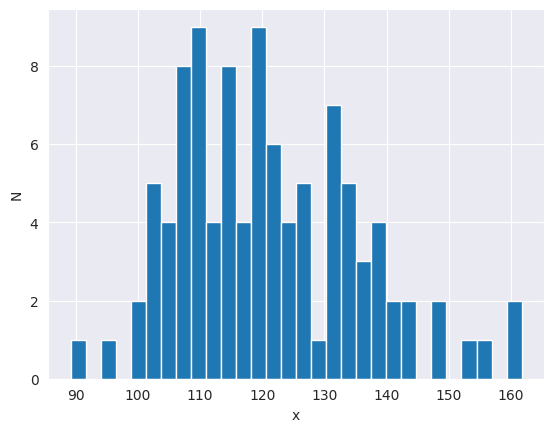

In [56]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456) #WHY DO I DO THIS??
## I think that she chose a seed to ensure reproducibility so that we may all get the same values for the distribution.
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [57]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 121.10, standard deviation: 14.54


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000 - note that generally size > 30 is considered necessary for the theorem to hold). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [58]:
#mysize = (np.random.rand(100) * 1000).astype(int) # np.random.rand(m) gives you m "random" numbers between [0,1)
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
mysize = (np.logspace(1, 3.3, 100, base=10)).astype(int)
#mysize.... I chose the logspace but made the stop 3.3 instead of 4.3 to push it to have more <30 sample numbers.
print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)
mysize

shape of the 'size' list that contains the size of each distribution (100,)


array([  10,   10,   11,   11,   12,   13,   13,   14,   15,   16,   17,
         18,   19,   20,   21,   22,   23,   24,   26,   27,   29,   30,
         32,   34,   36,   38,   40,   42,   44,   47,   49,   52,   55,
         58,   61,   65,   68,   72,   76,   80,   84,   89,   94,   99,
        105,  111,  117,  123,  130,  137,  145,  153,  161,  170,  179,
        189,  199,  210,  222,  234,  247,  261,  275,  290,  306,  323,
        341,  360,  380,  400,  422,  446,  470,  496,  523,  552,  582,
        615,  648,  684,  722,  761,  803,  847,  894,  943,  995, 1050,
       1107, 1168, 1232, 1300, 1372, 1447, 1526, 1610, 1699, 1792, 1891,
       1995])

Text(0, 0.5, 'frequency')

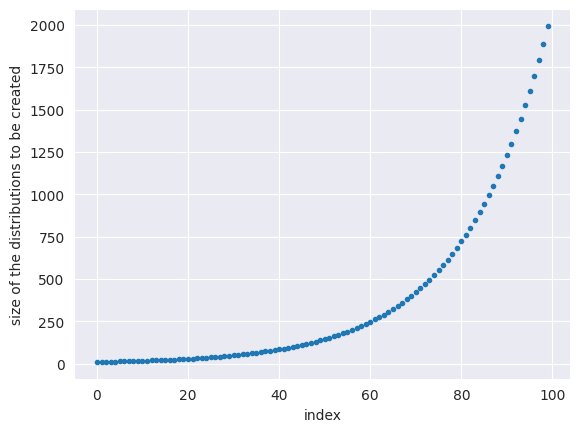

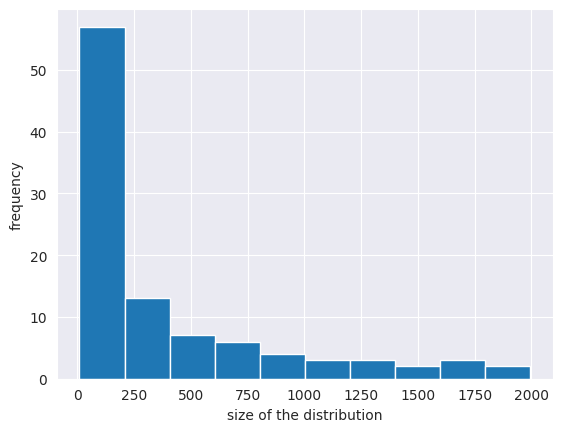

In [59]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, my choice also does not produce more small then large distribution, which is desirable)

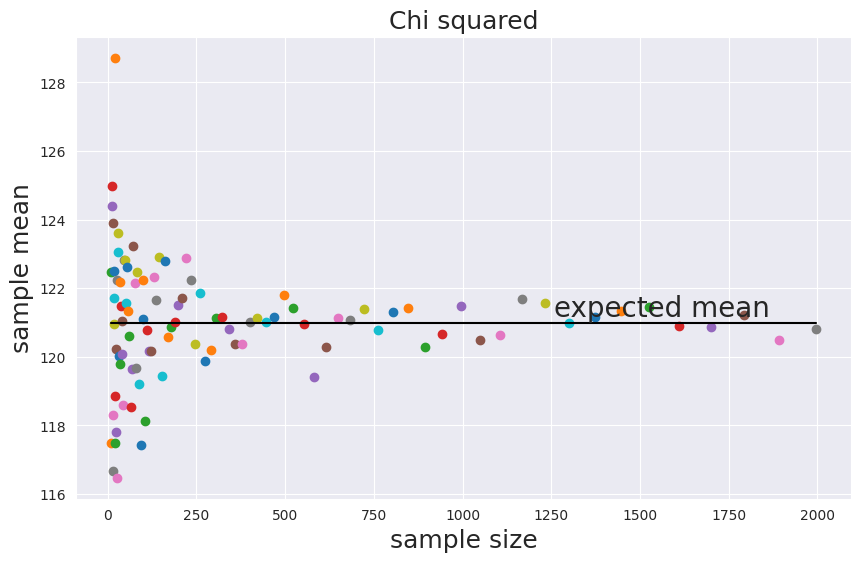

In [60]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=121

# save the means for plotting later

mydists['chisq']['means'] = {}

# prepare the figure

axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, df, "expected mean",
                  va="bottom", fontsize=20); # I changed the value of y here from
                  # 100 to df to always show the text even if the value of the
                  # expected mean is changed.

### Figure 2: Distribution of means for the the chi-squared distributions for the samples with mean 121 generated. The graph supports the law of large numbers as it can be observed that as the sample size increases the mean of the sample tends to the mean of the population, in this case 121.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

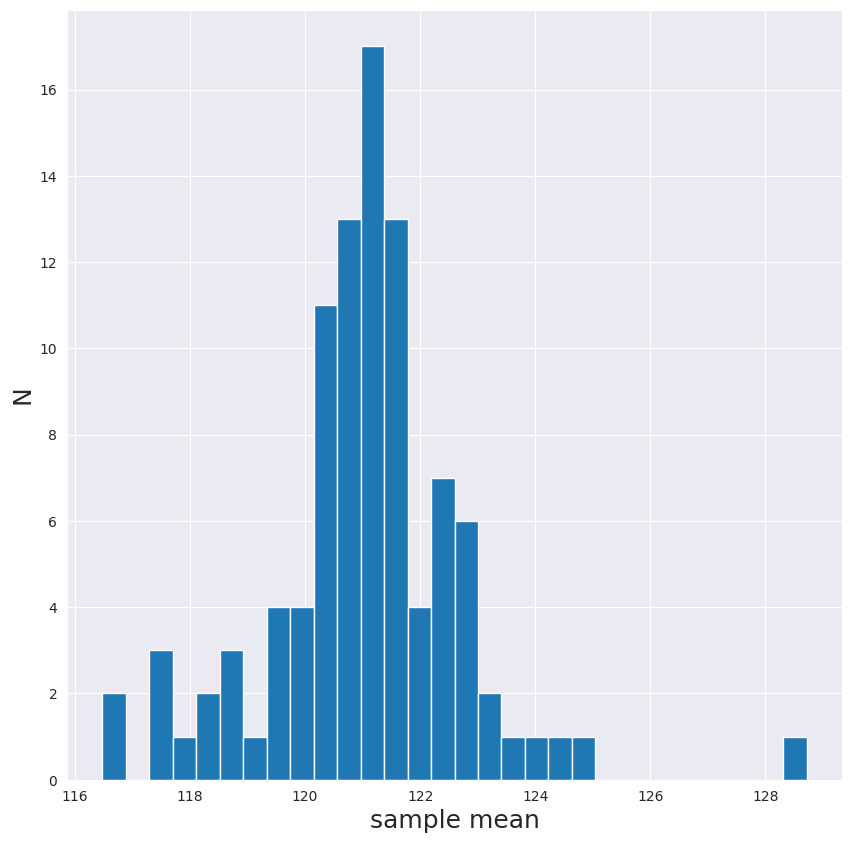

In [61]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

## Figure 3: Histogram of the frequency of the sample mean value of the chi-squared distributions.

I will use the same samples for all of the distributions. I hope that is okay.

# Do it for the Normal distribution


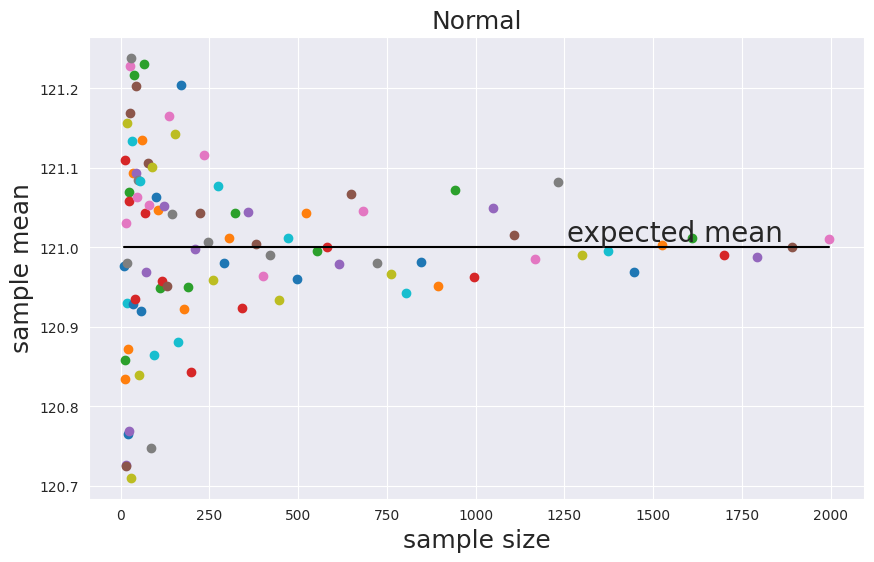

In [62]:
# Creating the key 'normal' in the mydist dictionary

mydists['normal'] = {}


for n in mysize:
    mydists['normal'][n] = numpy.random.normal(df, size = n) #all distributions have mean=df=121, and scale (spread) of 1

# save the means for plotting later

mydists['normal']['means'] = {}

# prepare the figure following the notation used in the previous distribution

axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['normal']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['normal']['means'][nn] = mydists['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, mydists['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=18)
axnormal_mu_n.set_title('Normal', fontsize=18)
axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axnormal_mu_n.text(axnormal_mu_n.get_xlim()[1] * .6, df, "expected mean",
                  va="bottom", fontsize=20); # I changed the value of y here from
                  # 100 to df to always show the text even if the value of the
                  # expected mean is changed.

# Figure 4. Distribution of means for the the normal distributions for the samples with mean 121 generated. The graph supports the law of large numbers as it can be observed that as the sample size increases the mean of the sample tends to the mean of the population, in this case 121.

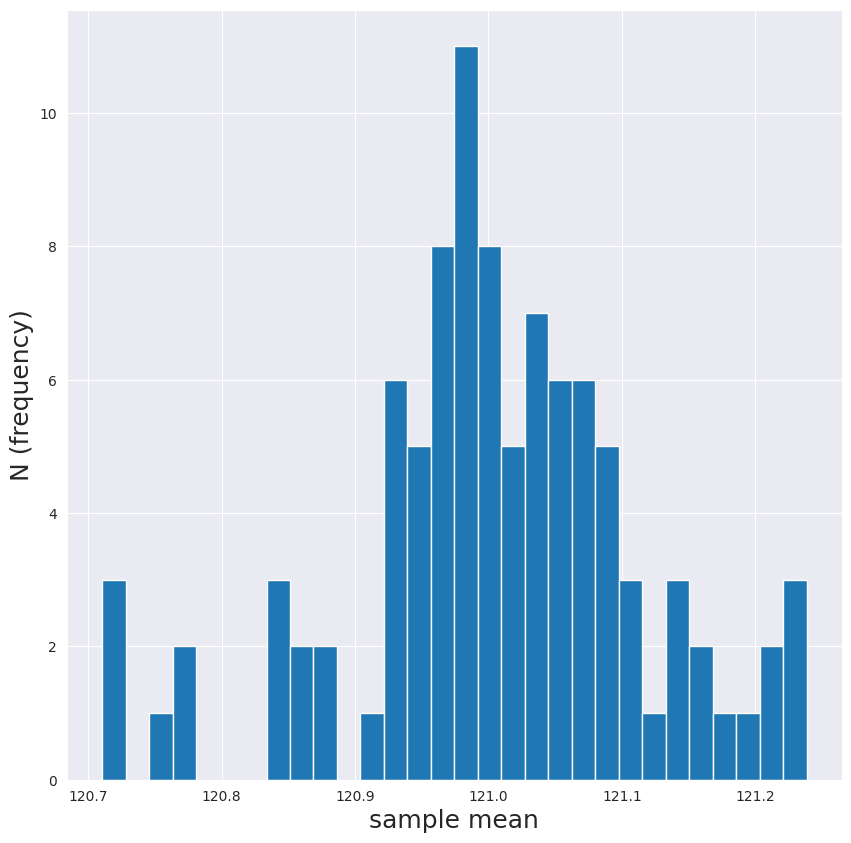

In [63]:
allmeans_normal = list(mydists['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_normal,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N (frequency)', fontsize = 18);

# Figure 5: Histogram of the frequency of the sample mean value of the normal distributions.

# Do it for the Poisson distribution

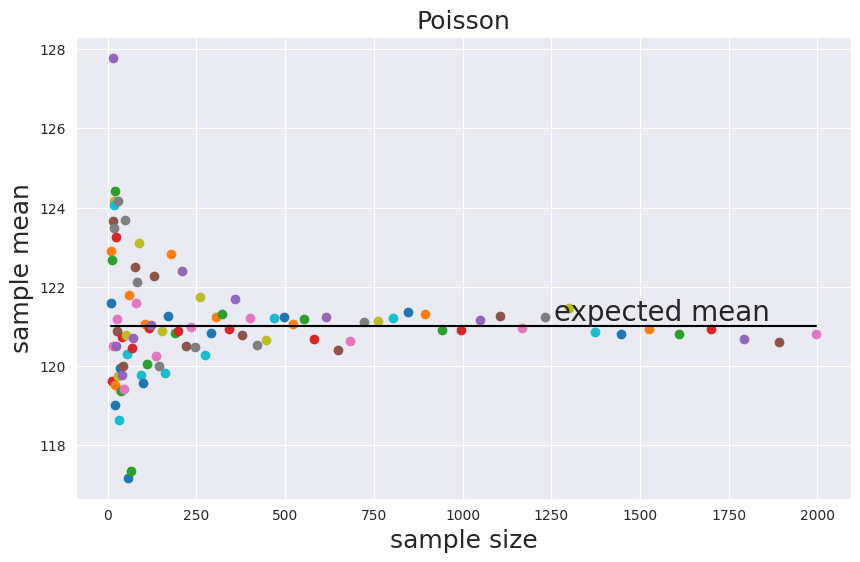

In [64]:
# Creating the key 'pois' in the mydist dictionary

mydists['pois'] = {}


for n in mysize:
    mydists['pois'][n] = numpy.random.poisson(df, size = n) #all distributions have lam=mean=df=121, I am not sure if this is what the lam means, but online says that is what the mean usually is.

# save the means for plotting later

mydists['pois']['means'] = {}

# prepare the figure following the notation used in the first distribution

axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['pois']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['pois']['means'][nn] = mydists['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, mydists['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
axpois_mu_n.set_title('Poisson', fontsize=18)
axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, df, "expected mean",
                  va="bottom", fontsize=20); # I changed the value of y here from
                  # 100 to df to always show the text even if the value of the
                  # expected mean is changed.

# Figure 6. Distribution of means for the the Poisson distributions for the samples with mean 121 generated. The graph supports the law of large numbers as it can be observed that as the sample size increases the mean of the sample tends to the mean of the population, in this case 121.

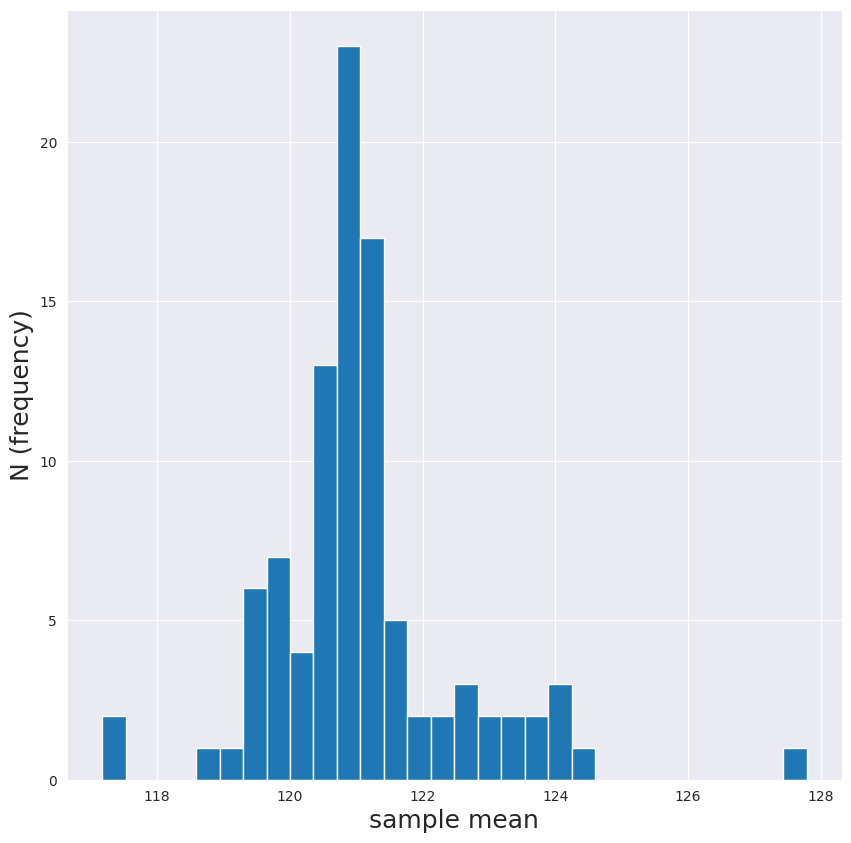

In [65]:
allmeans_pois = list(mydists['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N (frequency)', fontsize = 18);

# Figure 7: Histogram of the frequency of the sample mean value of the Poisson distributions.

# Do it for the Binomial distribution

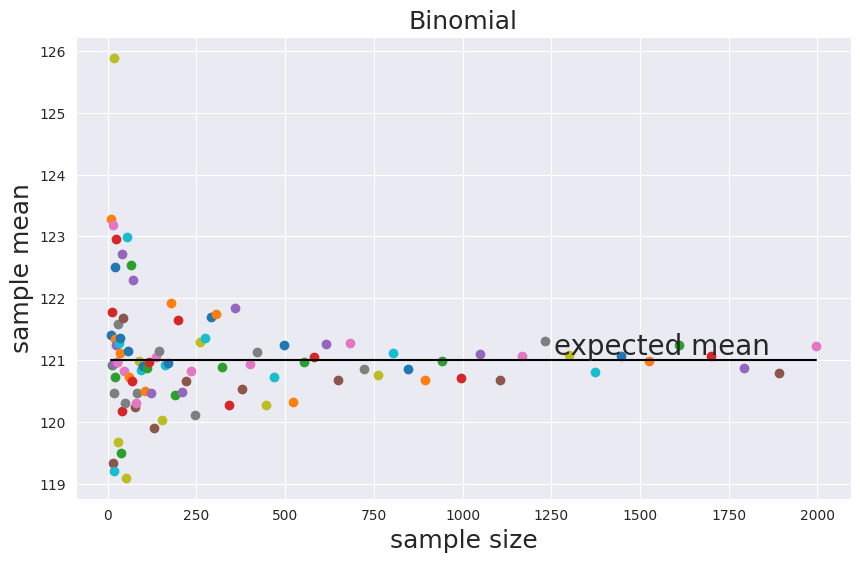

In [66]:
# Creating the key 'binomial' in the mydist dictionary

mydists['binomial'] = {}


for n in mysize:
    mydists['binomial'][n] = numpy.random.binomial(242, 0.5, size = n) #all distributions have 242 trials,
    # a probability of 0.5 (as the mu = np), and size n, I am not sure if n and p were supposed to be fixed.

# save the means for plotting later

mydists['binomial']['means'] = {}

# prepare the figure following the notation used in the first distribution

axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binomial']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['binomial']['means'][nn] = mydists['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, mydists['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
axbinomial_mu_n.set_title('Binomial', fontsize=18)
axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, df, "expected mean",
                  va="bottom", fontsize=20); # I changed the value of y here from
                  # 100 to df to always show the text even if the value of the
                  # expected mean is changed.

# Figure 8. Distribution of means for the the Binomial distributions for the samples with 242 trials and 0.5 probability (i.e. mean 121) generated. The graph supports the law of large numbers as it can be observed that as the sample size increases the mean of the sample tends to the mean of the population, in this case 121.

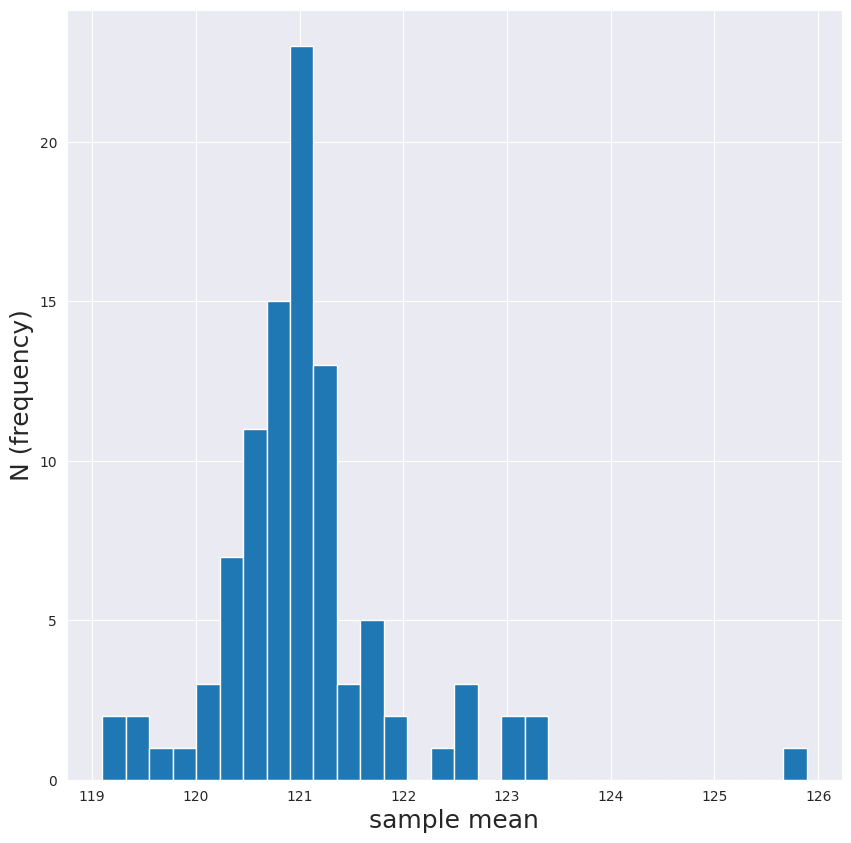

In [67]:
allmeans_binomial = list(mydists['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binomial,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N (frequency)', fontsize = 18);

# Figure 8: Histogram of the frequency of the sample mean value of the Binomial distributions of 242 trials and probability of 0.5.

# Do it for another distribution
## I used the Log-normal distribution


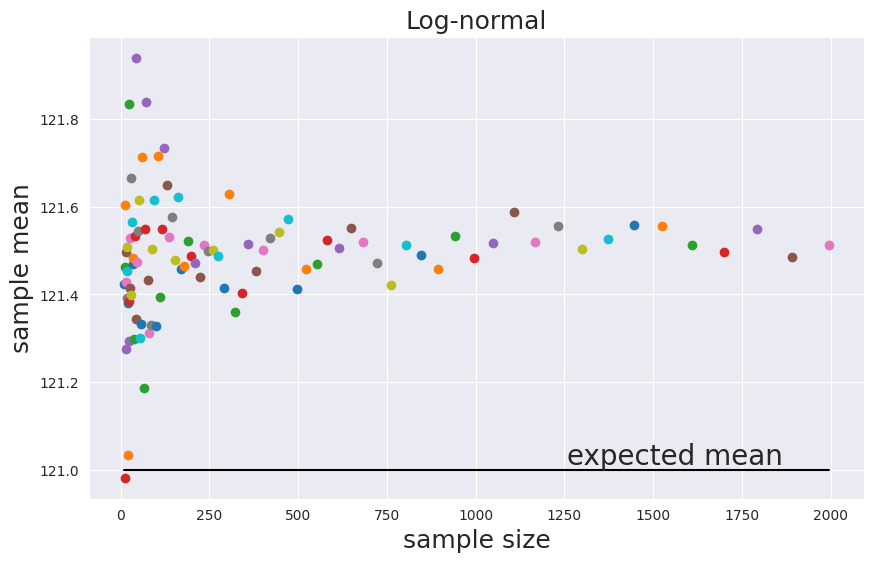

In [68]:
# Creating the key 'lnorm' in the mydist dictionary

mydists['lnorm'] = {}


for n in mysize:
    mydists['lnorm'][n] = numpy.random.lognormal(df, size = n)

# save the means for plotting later

mydists['lnorm']['means'] = {}

# prepare the figure following the notation used in the first distribution

axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['lnorm']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['lnorm']['means'][nn] = np.log(mydists['lnorm'][nn].mean()) #Taking the natural log of the means as the distribution is logarithmic
        #and plot it
        axlnorm_mu_n.plot(nn, mydists['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
axlnorm_mu_n.set_title('Log-normal', fontsize=18)
axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, df, "expected mean",
                  va="bottom", fontsize=20); # I changed the value of y here from
                  # 100 to df to always show the text even if the value of the
                  # expected mean is changed.

# Figure 9. Distribution of means for the the Log-normal distributions for the samples with mean of the underlying normal distribution of 121 generated. Despite the shift (which I believe is due to the handling of decimals of the log function), the graph supports the law of large numbers as it can be observed that as the sample size increases the mean of the sample tends to the mean of the population, in this case 121 (shifted by 0.6 but probably due to decimals handleling).

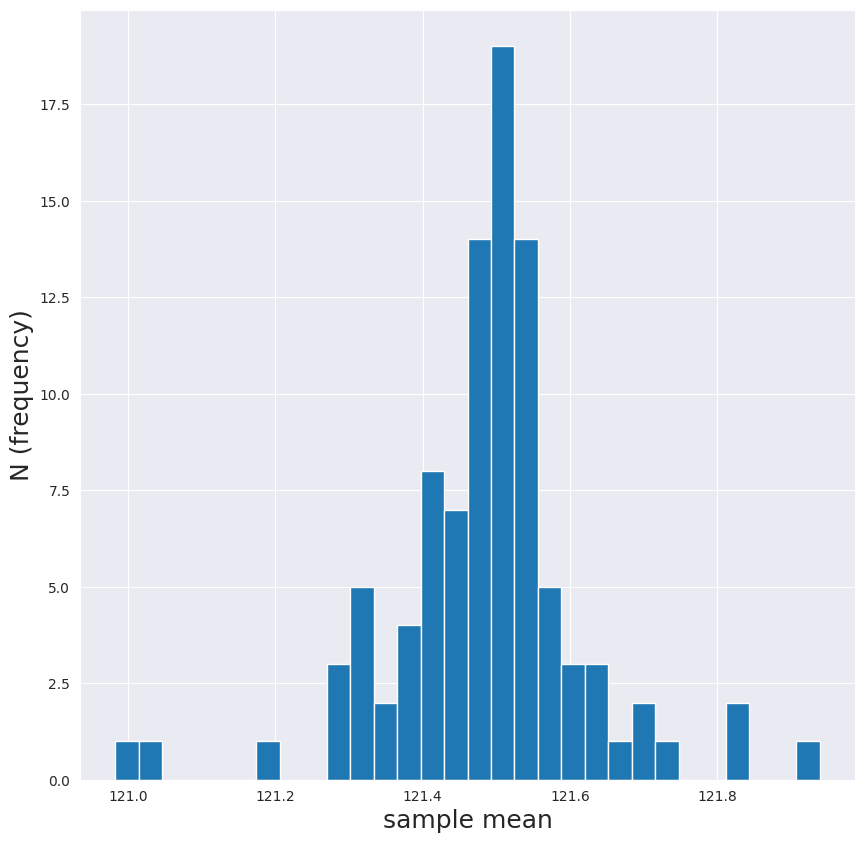

In [69]:
allmeans_lnorm = list(mydists['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_lnorm,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N (frequency)', fontsize = 18);

# Figure 10: Histogram of the frequency of the sample mean value of the Log-normal distributions with shifting error consistent to that presentedin Fig.9.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

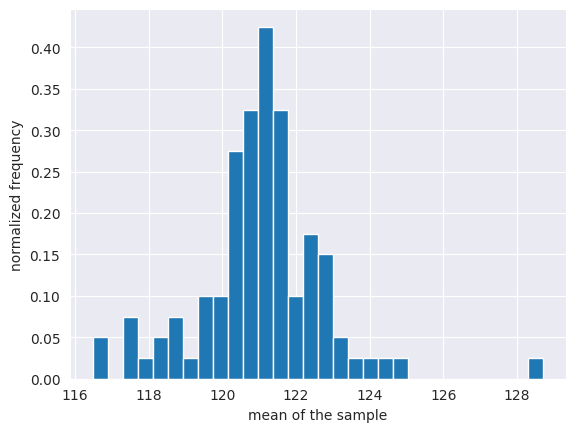

In [70]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

# Figure 11. Same as Fig. 3 (Histogram of the frequency of the sample mean value of the chi-squared distributions.)

And you can create your own Gaussian function to pass to curve_fit as this for example:

In [71]:
def gaussian(mu, sigma, x): # this is the gaussian you will fit
  g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  return g
  '''
  Returns the probability density of the given x based on the Gaussian distribution of
  the given mean and sigma.
  Keyword arguments:
  mu -- mean of the gaussian
  sigma -- sigma of the gaussian
  x -- single x value to be input in the guassian function
  '''

# Function to minimize (sum of squared differences)
def diff_fun(params, bins, heights): # this is the function you will minimize
  '''
  Returns the difference between the reported value of the histogram minus the
  value of the gaussian of the given mean and given sigma.
  Keyword arguments:
    params -- array containing the mean and sigma of the gaussian to be fitted
    centerBins -- array of values of the bin to take as x argument for the gaussian function
    heights -- array of height of the bins to compare the gaussian to
  '''
  centerBins = []
  for n in range(0,size(bins)-1):
    centerBins.append((bins[n+1]-bins[n])/2+bins[n])
  total_diff = 0
  for centerBin, height in zip(centerBins, heights):
      mu, sigma = params
      diff = height - gaussian(mu, sigma, centerBin)
      total_diff += diff**2

  return total_diff # needs to return a single number representing the "distance" between the heigh of the histogram bins and the gaussian you create

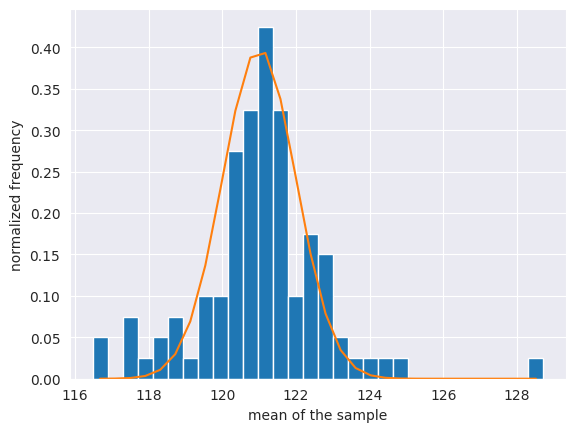

In [72]:
# plotting the Gaussian of sigma 1 and mean 121 into the same graph as the histogram

height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
x = []
for n in range(0,size(bins)-1):
  x.append((bins[n+1]-bins[n])/2+bins[n])
y = []
for n in x:
  y.append(gaussian(df, 1, n))
pl.plot(x,y, '-')

# Figure 12: Histogram of the frequency of the sample mean value of the normal distributions, and the Guassian curve (orange) for the given middle points of each bin, mean 121 and sigma of 1.

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [73]:
from scipy import optimize
# Initial guess for mean and sigma (121 and 1)
initial_guess = np.array([121, 1.0])
result = optimize.minimize(diff_fun, initial_guess, args=(bins, height))
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0605679098791958
        x: [ 1.211e+02  1.116e+00]
      nit: 6
      jac: [ 2.368e-06 -2.617e-07]
 hess_inv: [[ 1.551e+00  1.329e-01]
            [ 1.329e-01  2.067e+00]]
     nfev: 21
     njev: 7

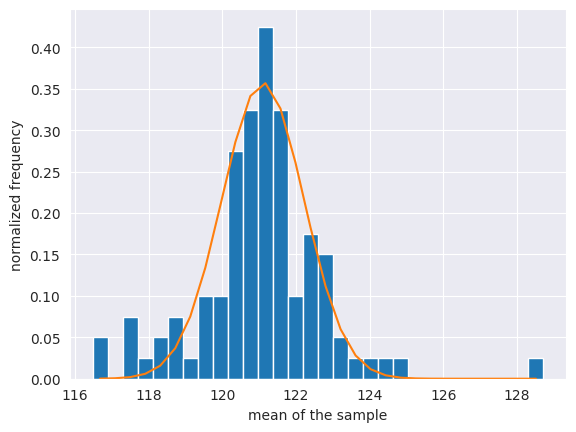

In [74]:
# Testing the output values
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");
x = []
for n in range(0,size(bins)-1):
  x.append((bins[n+1]-bins[n])/2+bins[n])
y = []
for n in x:
  y.append(gaussian(1.211e+02, 1.116e+00, n))
pl.plot(x,y, '-')

# Figure 12. Testing the minimization obtained from optimization of optimize.minimize (mean = 1.211e+02, sigma = 1.116e+00) in the distrubition of Fig.3. It is a better fit that the initial conditons (mean = 121, sigma = 1).

In [75]:
optimize.fmin(diff_fun, initial_guess, args=(bins, height))
result

Optimization terminated successfully.
         Current function value: 0.060568
         Iterations: 31
         Function evaluations: 64


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0605679098791958
        x: [ 1.211e+02  1.116e+00]
      nit: 6
      jac: [ 2.368e-06 -2.617e-07]
 hess_inv: [[ 1.551e+00  1.329e-01]
            [ 1.329e-01  2.067e+00]]
     nfev: 21
     njev: 7

# This method (optimize.fmin) yielded the same result as the above.